### More dirty work
Cleaning up the dataset. The goal here is to have a clean dataset with numeric values and no missing data. The notebook looks ugly because I didn't want to leave out any steps. For presentation pusrposes it would be nice to clean it up and make it look nice.

In [86]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [87]:
data = pd.read_csv('processed.csv')


In [88]:
data.head()

,Unnamed: 0,price,part,year,district,area,rooms,floor,tot_floors,type,...,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates
0,0,220000.0,Konjarnik,2015.0,Zvezdara,172.0,5.0,4.0,6.0,stan,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd","(44.7863832, 20.5156806)"
1,1,124000.0,Neimar,1970.0,Vračar,105.0,4.0,3.0,10.0,stan,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)"
2,2,69500.0,Kalenić pijaca,1970.0,Vračar,42.0,1.5,1.0,NaN,stan,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd","(44.8027465, 20.4773763)"
3,10,140000.0,Južni bulevar,2001.0,Vračar,86.0,3.0,2.0,6.0,stan,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1627.906977,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)"
4,11,129900.0,Dorćol,1988.0,Stari grad,78.0,3.5,2.0,6.0,stan,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1665.384615,"Dunavski kej, Beograd","(44.7689215, 20.61861)"


In [89]:
del data['Unnamed: 0']

In [90]:
data.describe()

,price,year,area,rooms,floor,tot_floors,cent_heat,rem_heat,intercom,internet,...,elevator,new,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm
count,1.968000e+03,1968.00000,1968.000000,1968.000000,1559.000000,1866.000000,1968.000000,1968.000000,1968.000000,1968.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1.016497e+05,1991.36687,228.524934,2.591972,3.151700,4.855305,0.520833,0.102642,0.784045,0.314024,...,0.462907,0.315041,0.446138,0.368394,0.785061,0.752033,0.037093,0.749492,0.311992,1357.090392
std,8.482843e+04,26.28833,4075.786705,1.067463,2.530351,2.825101,0.499693,0.303568,0.411588,0.464244,...,0.498749,0.464650,0.497217,0.482492,0.410884,0.431943,0.189039,0.433416,0.463424,580.085403
min,1.000000e+00,1917.00000,1.000000,0.500000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000758
25%,4.900000e+04,1972.00000,46.875000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,968.069298
50%,7.900000e+04,2003.00000,63.000000,2.500000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1232.988372
75%,1.225000e+05,2014.00000,86.000000,3.000000,4.000000,6.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1666.666667
max,1.100000e+06,2018.00000,120000.000000,11.000000,26.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11658.064516


In [91]:
data.isnull().sum()

price                0
part                76
year                 0
district             0
area                 0
rooms                0
floor              409
tot_floors         102
type                 0
street              51
cent_heat            0
rem_heat             0
intercom             0
internet             0
cable                0
sewer                0
aircon               0
elevator             0
new                  0
parking              0
basement             0
phone                0
terrace              0
being_built          0
papers               0
enterable            0
euro_per_sqm         0
location_string      0
coordinates          0
dtype: int64

We have a lot of missing data in the floor column, which is strange.

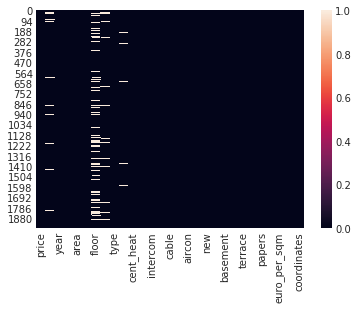

In [92]:

sns.heatmap(data.isnull());

In [93]:
data.describe()

,price,year,area,rooms,floor,tot_floors,cent_heat,rem_heat,intercom,internet,...,elevator,new,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm
count,1.968000e+03,1968.00000,1968.000000,1968.000000,1559.000000,1866.000000,1968.000000,1968.000000,1968.000000,1968.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1.016497e+05,1991.36687,228.524934,2.591972,3.151700,4.855305,0.520833,0.102642,0.784045,0.314024,...,0.462907,0.315041,0.446138,0.368394,0.785061,0.752033,0.037093,0.749492,0.311992,1357.090392
std,8.482843e+04,26.28833,4075.786705,1.067463,2.530351,2.825101,0.499693,0.303568,0.411588,0.464244,...,0.498749,0.464650,0.497217,0.482492,0.410884,0.431943,0.189039,0.433416,0.463424,580.085403
min,1.000000e+00,1917.00000,1.000000,0.500000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000758
25%,4.900000e+04,1972.00000,46.875000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,968.069298
50%,7.900000e+04,2003.00000,63.000000,2.500000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1232.988372
75%,1.225000e+05,2014.00000,86.000000,3.000000,4.000000,6.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1666.666667
max,1.100000e+06,2018.00000,120000.000000,11.000000,26.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11658.064516


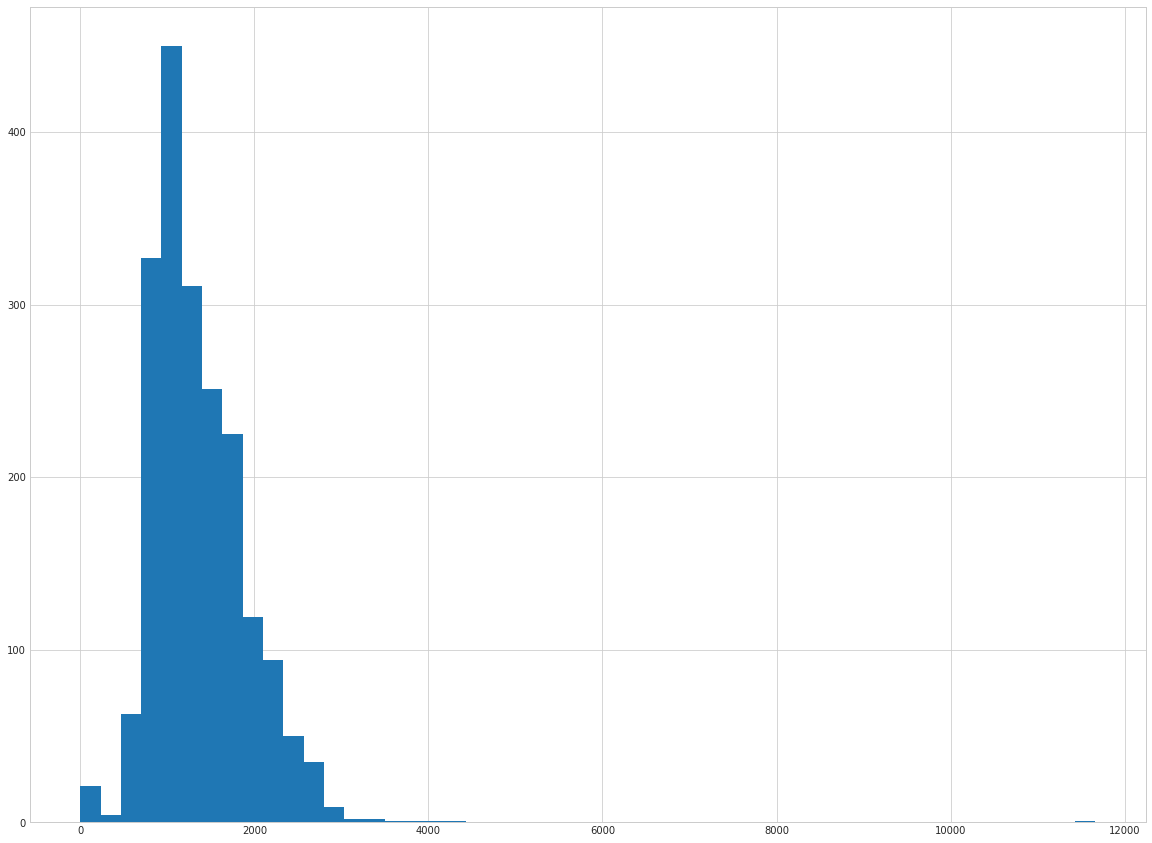

In [94]:
data['euro_per_sqm'].hist(bins=50, figsize=(20,15));
plt.show()

In [95]:
data[data['price']<20000]

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates
170,1500.0,Cvetkova pijaca,2017.0,Zvezdara,1.0,3.0,1.0,5.0,stan,Hajduk Stankova,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1500.000000,"Hajduk Stankova, Beograd","(44.7342881, 20.6124167)"
525,91.0,Lekino brdo,2010.0,Voždovac,120000.0,2.5,3.0,3.0,stan,Banjalučka,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000758,"Banjalučka, Beograd","(44.389751, 20.2784424)"
550,1.0,Lekino brdo,2009.0,Voždovac,30.0,1.0,NaN,4.0,stan,Sejkina 45b,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.033333,"Sejkina 45b, Beograd","(44.80230865, 20.5301980861564)"
553,2200.0,Cvetkova pijaca,2016.0,Zvezdara,88.0,4.0,4.0,6.0,stan,Vojislava Ilica,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,25.000000,"Vojislava Ilica, Beograd","(44.7924687, 20.4964823)"
580,1000.0,Novi grad,2017.0,Zemun,42.0,2.0,3.0,3.0,stan,Vojni put 2,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,23.809524,"Vojni put 2, Beograd","(44.842887, 20.3708087)"
583,1650.0,Cvetkova pijaca,2017.0,Zvezdara,1.0,3.0,1.0,5.0,stan,Gospodara Vučića,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1650.000000,"Gospodara Vučića, Beograd","(44.7932746, 20.5038736)"
635,2200.0,Cvetkova pijaca,2016.0,Zvezdara,69.0,3.0,3.0,6.0,stan,Vojislava Ilica,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,31.884058,"Vojislava Ilica, Beograd","(44.7924687, 20.4964823)"
647,13500.0,Kumodraž 2,1980.0,Voždovac,18.0,1.0,NaN,3.0,stan,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.000000,"Kumodraž 2, Beograd","(44.7489682, 20.4989876)"
754,212.0,Umka,1980.0,Čukarica,46.0,2.0,NaN,4.0,stan,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.608696,"1, Beograd","(44.8178131, 20.4568974)"
756,1450.0,Novo groblje,2017.0,Zvezdara,26.0,0.5,1.0,3.0,stan,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,55.769231,"Novo groblje, Beograd","(44.46336545, 20.6702861255258)"


In [96]:
data[data['price']>400000]

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates
8,440000.0,Kalenić pijaca,1954.0,Vračar,187.0,4.5,1.0,6.0,stan,Njegoševa,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2352.941176,"Njegoševa, Beograd","(44.8464243, 20.4093497)"
10,490000.0,Kalenić pijaca,2000.0,Vračar,250.0,5.0,3.0,5.0,stan,Ljubostinjska,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1960.000000,"Ljubostinjska, Beograd","(44.8016779, 20.479757)"
28,450000.0,Trg Republike,1936.0,Stari grad,140.0,5.0,3.0,4.0,stan,Kneza Mihaila,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3214.285714,"Kneza Mihaila, Beograd","(44.6546284, 20.1989632)"
40,439011.0,Dedinje,2011.0,Savski Venac,190.0,5.0,2.0,2.0,stan,Slavka Ćuruvije,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2310.584211,"Slavka Ćuruvije, Beograd","(44.7609615, 20.4543356)"
71,494000.0,Senjak,1985.0,Savski Venac,200.0,4.0,1.0,3.0,stan,Senjačka,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2470.000000,"Senjačka, Beograd","(44.7938128, 20.4407383)"
76,420000.0,Gornji Dorćol,1938.0,Stari grad,230.0,5.0,5.0,5.0,stan,Strahinjica Bana 52b,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1826.086957,"Strahinjica Bana 52b, Beograd","(44.8217404, 20.4620074)"
281,513000.0,Hram Svetog Save,2013.0,Vračar,216.0,4.0,3.0,4.0,stan,Dubljanska,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2375.000000,"Dubljanska, Beograd","(44.7959198, 20.4709548)"
652,480000.0,Banovo brdo,2012.0,Čukarica,230.0,4.0,6.0,6.0,stan,Zrmanjska,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2086.956522,"Zrmanjska, Beograd","(44.7845726, 20.4200575)"
867,420000.0,Autokomanda,2007.0,Voždovac,190.0,6.0,NaN,2.0,stan,Milovana Marinkovića,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2210.526316,"Milovana Marinkovića, Beograd","(44.7816548, 20.468537)"
1214,430000.0,Dorćol,2007.0,Stari grad,236.0,7.0,4.0,5.0,stan,Dositejeva,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1822.033898,"Dositejeva, Beograd","(44.8458937, 20.4105309)"


Here only the row with ID = 1637 looks suspicious. It should probably be 72.000...

In [97]:
data.loc[1637]['price']

722800.0

In [98]:
data[data['price']>400000]

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates
8,440000.0,Kalenić pijaca,1954.0,Vračar,187.0,4.5,1.0,6.0,stan,Njegoševa,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2352.941176,"Njegoševa, Beograd","(44.8464243, 20.4093497)"
10,490000.0,Kalenić pijaca,2000.0,Vračar,250.0,5.0,3.0,5.0,stan,Ljubostinjska,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1960.000000,"Ljubostinjska, Beograd","(44.8016779, 20.479757)"
28,450000.0,Trg Republike,1936.0,Stari grad,140.0,5.0,3.0,4.0,stan,Kneza Mihaila,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3214.285714,"Kneza Mihaila, Beograd","(44.6546284, 20.1989632)"
40,439011.0,Dedinje,2011.0,Savski Venac,190.0,5.0,2.0,2.0,stan,Slavka Ćuruvije,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2310.584211,"Slavka Ćuruvije, Beograd","(44.7609615, 20.4543356)"
71,494000.0,Senjak,1985.0,Savski Venac,200.0,4.0,1.0,3.0,stan,Senjačka,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2470.000000,"Senjačka, Beograd","(44.7938128, 20.4407383)"
76,420000.0,Gornji Dorćol,1938.0,Stari grad,230.0,5.0,5.0,5.0,stan,Strahinjica Bana 52b,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1826.086957,"Strahinjica Bana 52b, Beograd","(44.8217404, 20.4620074)"
281,513000.0,Hram Svetog Save,2013.0,Vračar,216.0,4.0,3.0,4.0,stan,Dubljanska,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2375.000000,"Dubljanska, Beograd","(44.7959198, 20.4709548)"
652,480000.0,Banovo brdo,2012.0,Čukarica,230.0,4.0,6.0,6.0,stan,Zrmanjska,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2086.956522,"Zrmanjska, Beograd","(44.7845726, 20.4200575)"
867,420000.0,Autokomanda,2007.0,Voždovac,190.0,6.0,NaN,2.0,stan,Milovana Marinkovića,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2210.526316,"Milovana Marinkovića, Beograd","(44.7816548, 20.468537)"
1214,430000.0,Dorćol,2007.0,Stari grad,236.0,7.0,4.0,5.0,stan,Dositejeva,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1822.033898,"Dositejeva, Beograd","(44.8458937, 20.4105309)"


In [99]:
# let's try to fix the floor
data['floor'].median()

3.0

In [100]:
data['tot_floors'].median()

4.0

### Floors problem
I could just impute the missing floor and total floors values with the median, but I could come up with a situation where the number of total floors is present and is, for example, 2, while the imputed value of the floor is 3. To try to overcome this, I could make a simple function:
* check if the tot_floors is present (and usually it is)
* if the imputed median value (3) is less or equal the total number of floors - use it
* if it is bigger, ajust for that and increase the total number of floors... etc

I could, but I won't. Since this should present no computational problems, I will just impute the values with the medians and deal with the paradoxes later...


In [101]:
# fix
data.loc[1637]['price'] = data.loc[1637]['price']/10

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
# fix the total floors
data['tot_floors'].fillna(data['tot_floors'].median(), inplace=True)

In [103]:
data['floor'].fillna(data['floor'].median(),inplace=True)

## Outliers
There is a lot of ads where the seller entered the wrong price, like 1234 instead of 123.400. While I could devise a strategy to determine a factor (10, 100 or 1000) by which to multilply the price.

For now I am just going to drop them alltogether...

In [104]:
len(data[data['euro_per_sqm']>2500])

58

In [105]:
#data = data[data['price']>20000]

In [106]:
data[data['price']<20000] # we'll just chop these

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates
170,1500.0,Cvetkova pijaca,2017.0,Zvezdara,1.0,3.0,1.0,5.0,stan,Hajduk Stankova,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1500.000000,"Hajduk Stankova, Beograd","(44.7342881, 20.6124167)"
525,91.0,Lekino brdo,2010.0,Voždovac,120000.0,2.5,3.0,3.0,stan,Banjalučka,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000758,"Banjalučka, Beograd","(44.389751, 20.2784424)"
550,1.0,Lekino brdo,2009.0,Voždovac,30.0,1.0,3.0,4.0,stan,Sejkina 45b,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.033333,"Sejkina 45b, Beograd","(44.80230865, 20.5301980861564)"
553,2200.0,Cvetkova pijaca,2016.0,Zvezdara,88.0,4.0,4.0,6.0,stan,Vojislava Ilica,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,25.000000,"Vojislava Ilica, Beograd","(44.7924687, 20.4964823)"
580,1000.0,Novi grad,2017.0,Zemun,42.0,2.0,3.0,3.0,stan,Vojni put 2,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,23.809524,"Vojni put 2, Beograd","(44.842887, 20.3708087)"
583,1650.0,Cvetkova pijaca,2017.0,Zvezdara,1.0,3.0,1.0,5.0,stan,Gospodara Vučića,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1650.000000,"Gospodara Vučića, Beograd","(44.7932746, 20.5038736)"
635,2200.0,Cvetkova pijaca,2016.0,Zvezdara,69.0,3.0,3.0,6.0,stan,Vojislava Ilica,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,31.884058,"Vojislava Ilica, Beograd","(44.7924687, 20.4964823)"
647,13500.0,Kumodraž 2,1980.0,Voždovac,18.0,1.0,3.0,3.0,stan,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.000000,"Kumodraž 2, Beograd","(44.7489682, 20.4989876)"
754,212.0,Umka,1980.0,Čukarica,46.0,2.0,3.0,4.0,stan,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.608696,"1, Beograd","(44.8178131, 20.4568974)"
756,1450.0,Novo groblje,2017.0,Zvezdara,26.0,0.5,1.0,3.0,stan,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,55.769231,"Novo groblje, Beograd","(44.46336545, 20.6702861255258)"


In [107]:
filtered_data = data[data['price']>20000] 

In [108]:
filtered_data.describe()

,price,year,area,rooms,floor,tot_floors,cent_heat,rem_heat,intercom,internet,...,elevator,new,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,...,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,1.027814e+05,1991.260668,169.041681,2.598715,3.125193,4.814910,0.521337,0.101285,0.784062,0.312082,...,0.464267,0.312082,0.445244,0.370694,0.786632,0.753728,0.034961,0.753728,0.309512,1367.744411
std,8.467946e+04,26.334103,3070.084303,1.063456,2.260522,2.765284,0.499673,0.301784,0.411578,0.463462,...,0.498850,0.463462,0.497121,0.483115,0.409790,0.430950,0.183729,0.430950,0.462411,571.800772
min,2.050000e+04,1917.000000,18.000000,0.500000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706897
25%,5.000000e+04,1972.000000,47.000000,2.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,976.086957
50%,7.990000e+04,2003.000000,63.000000,2.500000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1239.130435
75%,1.240000e+05,2014.000000,86.000000,3.000000,4.000000,6.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1672.131148
max,1.100000e+06,2018.000000,116000.000000,11.000000,26.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11658.064516


In [109]:
filtered_data.isnull().sum()

price               0
part               76
year                0
district            0
area                0
rooms               0
floor               0
tot_floors          0
type                0
street             48
cent_heat           0
rem_heat            0
intercom            0
internet            0
cable               0
sewer               0
aircon              0
elevator            0
new                 0
parking             0
basement            0
phone               0
terrace             0
being_built         0
papers              0
enterable           0
euro_per_sqm        0
location_string     0
coordinates         0
dtype: int64

In [110]:
# now we just drop the part and street name...
del filtered_data['street']
del filtered_data['part']

In [111]:
filtered_data.columns

Index([u'price', u'year', u'district', u'area', u'rooms', u'floor',
       u'tot_floors', u'type', u'cent_heat', u'rem_heat', u'intercom',
       u'internet', u'cable', u'sewer', u'aircon', u'elevator', u'new',
       u'parking', u'basement', u'phone', u'terrace', u'being_built',
       u'papers', u'enterable', u'euro_per_sqm', u'location_string',
       u'coordinates'],
      dtype='object')

In [112]:
filtered_data.isnull().sum()

price              0
year               0
district           0
area               0
rooms              0
floor              0
tot_floors         0
type               0
cent_heat          0
rem_heat           0
intercom           0
internet           0
cable              0
sewer              0
aircon             0
elevator           0
new                0
parking            0
basement           0
phone              0
terrace            0
being_built        0
papers             0
enterable          0
euro_per_sqm       0
location_string    0
coordinates        0
dtype: int64

In [113]:
# GET BACK TO USING DATA
data = filtered_data

In [114]:
data.dtypes

price              float64
year               float64
district            object
area               float64
rooms              float64
floor              float64
tot_floors         float64
type                object
cent_heat          float64
rem_heat           float64
intercom           float64
internet           float64
cable              float64
sewer              float64
aircon             float64
elevator           float64
new                float64
parking            float64
basement           float64
phone              float64
terrace            float64
being_built        float64
papers             float64
enterable          float64
euro_per_sqm       float64
location_string     object
coordinates         object
dtype: object

In [115]:
# 

In [116]:
data.groupby(['district'])['euro_per_sqm'].mean()

district
Grocka           664.983913
Novi Beograd    1276.668780
Obrenovac        900.000000
Palilula        1166.065667
Rakovica         899.120338
Savski Venac    1682.023494
Stari grad      1982.683595
Surčin           643.053922
Voždovac        1216.355340
Vračar          1968.395445
Zemun           1041.710768
Zvezdara        1285.640633
Čukarica        1102.452051
Name: euro_per_sqm, dtype: float64

In [117]:
data['coordinates'][:5]

0    (44.7863832, 20.5156806)
1    (44.7921517, 20.4744391)
2    (44.8027465, 20.4773763)
3    (44.7921517, 20.4744391)
4      (44.7689215, 20.61861)
Name: coordinates, dtype: object

### Fix the coordinates
Just split the latitude and longitude


In [118]:
type(data['coordinates'][4])

str

In [119]:
data['coordinates'][2][0]

'('

In [120]:
print float(str(data['coordinates'][4]).strip('(').strip(')').split(',')[0])

44.7689215


In [121]:
print float(str(data['coordinates'][4]).strip('(').strip(')').split(',')[1])

20.61861


In [122]:
def latitude(row):
    return float(str(row['coordinates']).strip('(').strip(')').split(',')[0])

def longitude(row):
    return float(str(row['coordinates']).split(',')[1][:-1])

In [123]:
data['latitude'] = data.apply(latitude, axis=1)
data['longitude'] = data.apply(longitude, axis=1)

In [124]:
data.head(10)

,price,year,district,area,rooms,floor,tot_floors,type,cent_heat,rem_heat,...,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates,latitude,longitude
0,220000.0,2015.0,Zvezdara,172.0,5.0,4.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd","(44.7863832, 20.5156806)",44.786383,20.515681
1,124000.0,1970.0,Vračar,105.0,4.0,3.0,10.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
2,69500.0,1970.0,Vračar,42.0,1.5,1.0,4.0,stan,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd","(44.8027465, 20.4773763)",44.802746,20.477376
3,140000.0,2001.0,Vračar,86.0,3.0,2.0,6.0,stan,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1627.906977,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
4,129900.0,1988.0,Stari grad,78.0,3.5,2.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1665.384615,"Dunavski kej, Beograd","(44.7689215, 20.61861)",44.768921,20.618610
5,330000.0,2008.0,Stari grad,157.0,3.0,5.0,5.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,2101.910828,"Miće Popovića, Beograd","(44.8205296, 20.4715858)",44.820530,20.471586
6,399000.0,1934.0,Stari grad,179.0,5.0,1.0,6.0,stan,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2229.050279,"Terazije, Beograd","(44.8120805, 20.4615808)",44.812081,20.461581
7,199990.0,2015.0,Novi Beograd,125.0,4.0,5.0,5.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1599.920000,"Evropska, Beograd","(44.8086442, 20.3877758)",44.808644,20.387776
8,440000.0,1954.0,Vračar,187.0,4.5,1.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,2352.941176,"Njegoševa, Beograd","(44.8464243, 20.4093497)",44.846424,20.409350
9,244000.0,1930.0,Vračar,140.0,4.0,3.0,1.0,stan,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1742.857143,"Internacionalnih brigada, Beograd","(44.7946566, 20.4733132)",44.794657,20.473313


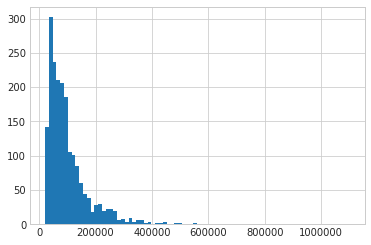

In [125]:
data['price'].hist(bins = 80);

In [126]:
len(data)

1945

In [127]:
data.columns

Index([u'price', u'year', u'district', u'area', u'rooms', u'floor',
       u'tot_floors', u'type', u'cent_heat', u'rem_heat', u'intercom',
       u'internet', u'cable', u'sewer', u'aircon', u'elevator', u'new',
       u'parking', u'basement', u'phone', u'terrace', u'being_built',
       u'papers', u'enterable', u'euro_per_sqm', u'location_string',
       u'coordinates', u'latitude', u'longitude'],
      dtype='object')

In [128]:
data.head(10)

,price,year,district,area,rooms,floor,tot_floors,type,cent_heat,rem_heat,...,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates,latitude,longitude
0,220000.0,2015.0,Zvezdara,172.0,5.0,4.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd","(44.7863832, 20.5156806)",44.786383,20.515681
1,124000.0,1970.0,Vračar,105.0,4.0,3.0,10.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
2,69500.0,1970.0,Vračar,42.0,1.5,1.0,4.0,stan,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd","(44.8027465, 20.4773763)",44.802746,20.477376
3,140000.0,2001.0,Vračar,86.0,3.0,2.0,6.0,stan,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1627.906977,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
4,129900.0,1988.0,Stari grad,78.0,3.5,2.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1665.384615,"Dunavski kej, Beograd","(44.7689215, 20.61861)",44.768921,20.618610
5,330000.0,2008.0,Stari grad,157.0,3.0,5.0,5.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,2101.910828,"Miće Popovića, Beograd","(44.8205296, 20.4715858)",44.820530,20.471586
6,399000.0,1934.0,Stari grad,179.0,5.0,1.0,6.0,stan,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2229.050279,"Terazije, Beograd","(44.8120805, 20.4615808)",44.812081,20.461581
7,199990.0,2015.0,Novi Beograd,125.0,4.0,5.0,5.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1599.920000,"Evropska, Beograd","(44.8086442, 20.3877758)",44.808644,20.387776
8,440000.0,1954.0,Vračar,187.0,4.5,1.0,6.0,stan,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,2352.941176,"Njegoševa, Beograd","(44.8464243, 20.4093497)",44.846424,20.409350
9,244000.0,1930.0,Vračar,140.0,4.0,3.0,1.0,stan,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1742.857143,"Internacionalnih brigada, Beograd","(44.7946566, 20.4733132)",44.794657,20.473313


### Simple analysis and charts

[Text(0,0.5,u'Count'), Text(0.5,1,u'Number of appartments per district')]

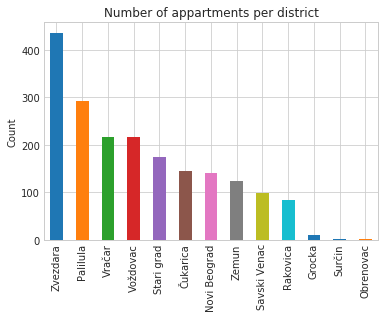

In [129]:
ax = data['district'].value_counts().plot('bar')
ax.set(ylabel='Count', title = 'Number of appartments per district')

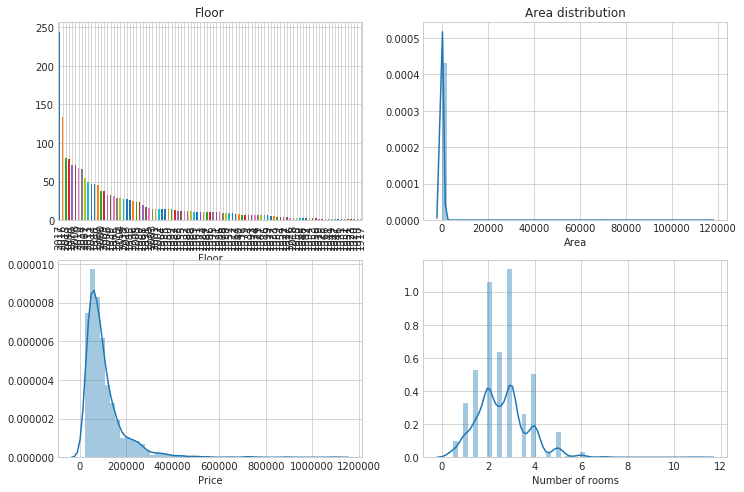

In [130]:
fig, ((ax1, ax2), 
      (ax3, ax4)
     ) = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

data.year.astype(int).value_counts().plot('bar', ax=ax1)
ax1.set(title='Floor', xlabel='Floor');

sns.distplot(data['area'], ax=ax2)
ax2.set(xlabel='Area', title='Area distribution');

sns.distplot(data['price'], ax=ax3)
ax3.set(xlabel='Price')

sns.distplot(data['rooms'], ax=ax4)
ax4.set(xlabel='Number of rooms');

In [131]:
data['area'].sort_values(ascending=False)[:10]

1687    116000.0
519      70000.0
1256      3022.0
1818       723.0
1667       600.0
977        446.0
1139       360.0
1512       339.0
1858       330.0
1108       312.0
Name: area, dtype: float64

In [132]:
# cut everything above 800 sqm
print len(data)

1945


In [133]:
data = data[data['area']<800]

In [134]:
print len(data)

1942


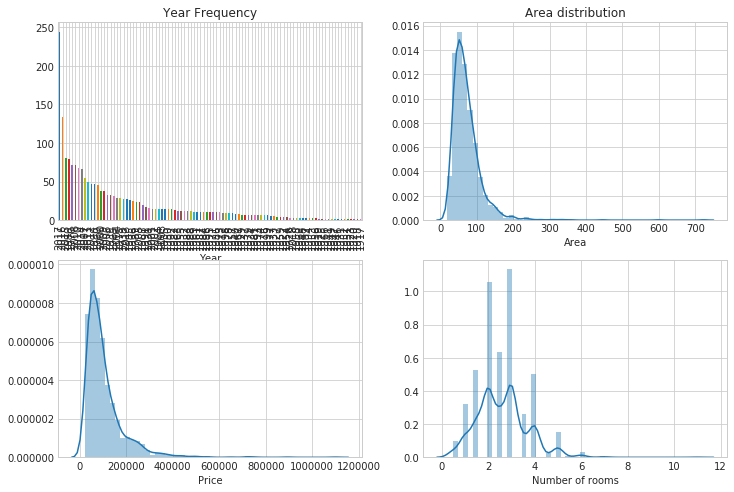

In [135]:
fig, ((ax1, ax2), 
      (ax3, ax4)
     ) = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

data.year.astype(int).value_counts().plot('bar', ax=ax1)
ax1.set(title='Year Frequency', xlabel='Year');

sns.distplot(data['area'], ax=ax2)
ax2.set(xlabel='Area', title='Area distribution');

sns.distplot(data['price'], ax=ax3)
ax3.set(xlabel='Price')

sns.distplot(data['rooms'], ax=ax4)
ax4.set(xlabel='Number of rooms');

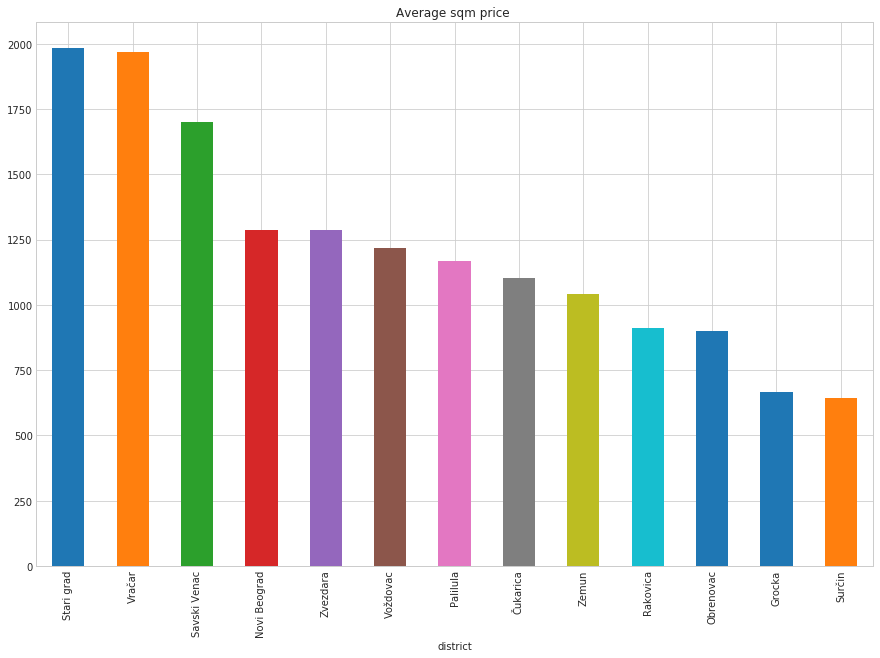

In [136]:
data.groupby(['district'])['euro_per_sqm'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,10),
                                                                                   title = 'Average sqm price ');

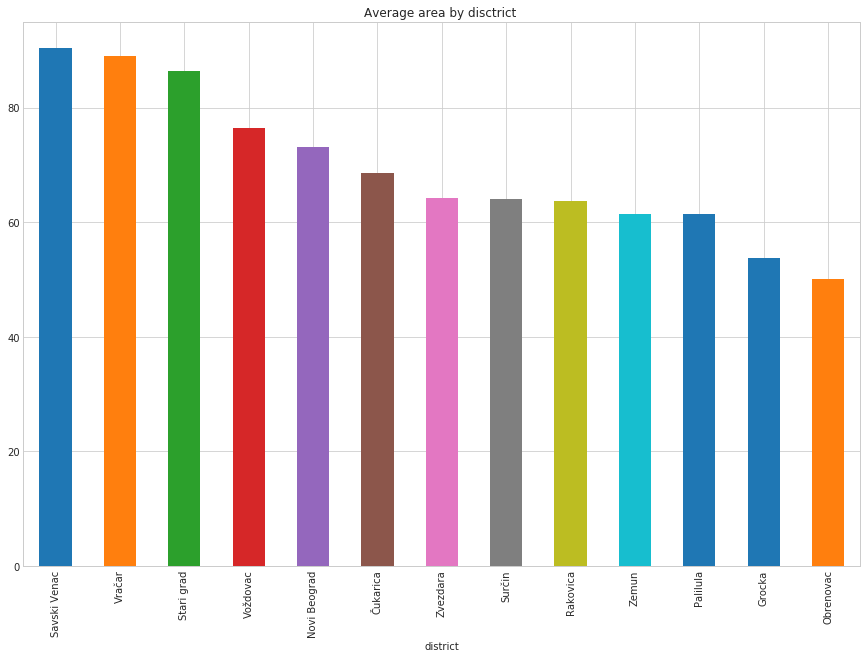

In [137]:
data.groupby(['district'])['area'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,10),
                                                                                   title = 'Average area by disctrict ');

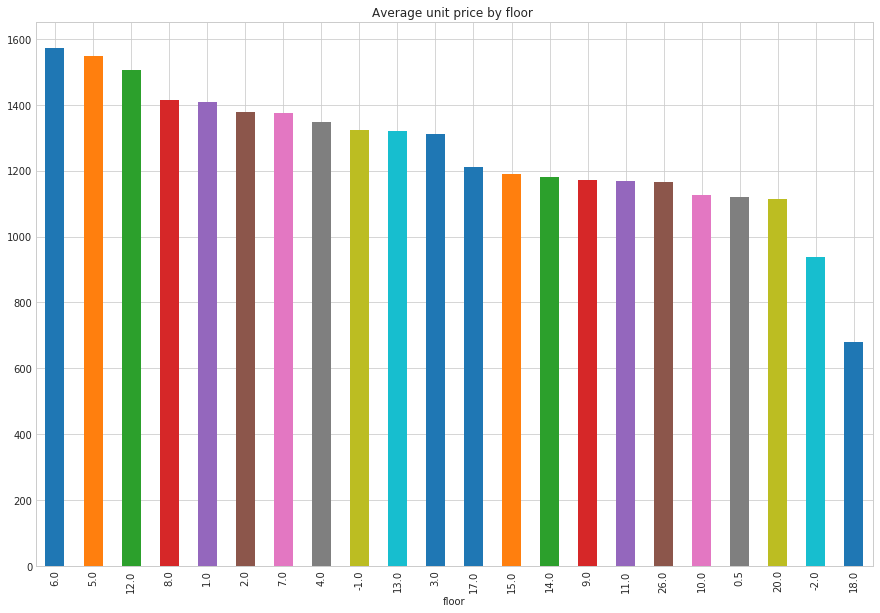

In [138]:
data.groupby(['floor'])['euro_per_sqm'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,10),
                                                                                   title = 'Average unit price by floor ');

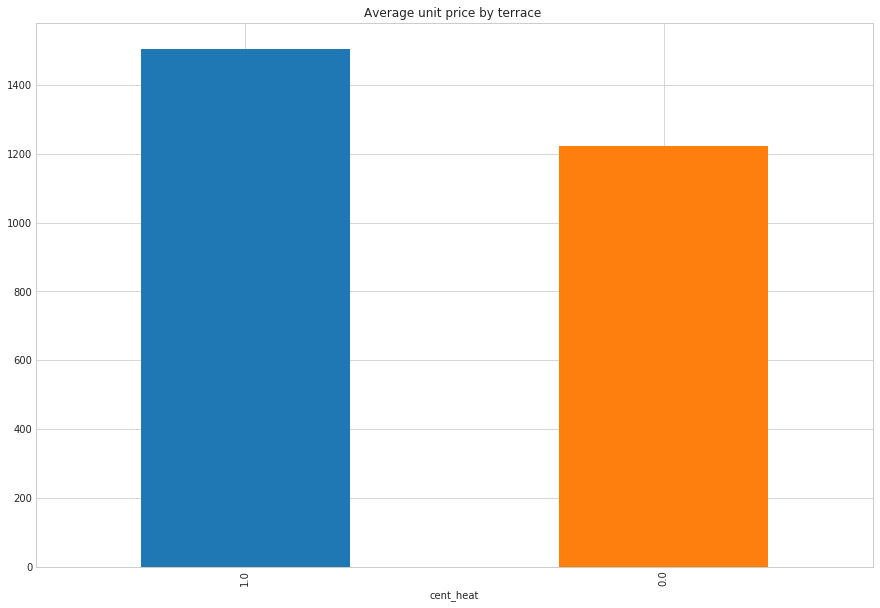

In [139]:
data.groupby(['cent_heat'])['euro_per_sqm'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,10),
                                                                                   title = 'Average unit price by terrace ');

In [140]:
dummies = pd.get_dummies(data['district'])

In [141]:
dummies.head(10)

,Grocka,Novi Beograd,Obrenovac,Palilula,Rakovica,Savski Venac,Stari grad,Surčin,Voždovac,Vračar,Zemun,Zvezdara,Čukarica
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [142]:
dummies.columns = [('D'+str(i)) for i in range(13)]

In [143]:
data2 = pd.concat([data, dummies], axis =1)

In [144]:
data2.head()

,price,year,district,area,rooms,floor,tot_floors,type,cent_heat,rem_heat,...,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12
0,220000.0,2015.0,Zvezdara,172.0,5.0,4.0,6.0,stan,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,124000.0,1970.0,Vračar,105.0,4.0,3.0,10.0,stan,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,69500.0,1970.0,Vračar,42.0,1.5,1.0,4.0,stan,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,140000.0,2001.0,Vračar,86.0,3.0,2.0,6.0,stan,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,129900.0,1988.0,Stari grad,78.0,3.5,2.0,6.0,stan,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
data2.dtypes

price              float64
year               float64
district            object
area               float64
rooms              float64
floor              float64
tot_floors         float64
type                object
cent_heat          float64
rem_heat           float64
intercom           float64
internet           float64
cable              float64
sewer              float64
aircon             float64
elevator           float64
new                float64
parking            float64
basement           float64
phone              float64
terrace            float64
being_built        float64
papers             float64
enterable          float64
euro_per_sqm       float64
location_string     object
coordinates         object
latitude           float64
longitude          float64
D0                   uint8
D1                   uint8
D2                   uint8
D3                   uint8
D4                   uint8
D5                   uint8
D6                   uint8
D7                   uint8
D

In [146]:
data2.dtypes

price              float64
year               float64
district            object
area               float64
rooms              float64
floor              float64
tot_floors         float64
type                object
cent_heat          float64
rem_heat           float64
intercom           float64
internet           float64
cable              float64
sewer              float64
aircon             float64
elevator           float64
new                float64
parking            float64
basement           float64
phone              float64
terrace            float64
being_built        float64
papers             float64
enterable          float64
euro_per_sqm       float64
location_string     object
coordinates         object
latitude           float64
longitude          float64
D0                   uint8
D1                   uint8
D2                   uint8
D3                   uint8
D4                   uint8
D5                   uint8
D6                   uint8
D7                   uint8
D

In [147]:
del data2['location_string']


In [148]:
data2.columns

Index([u'price', u'year', u'district', u'area', u'rooms', u'floor',
       u'tot_floors', u'type', u'cent_heat', u'rem_heat', u'intercom',
       u'internet', u'cable', u'sewer', u'aircon', u'elevator', u'new',
       u'parking', u'basement', u'phone', u'terrace', u'being_built',
       u'papers', u'enterable', u'euro_per_sqm', u'coordinates', u'latitude',
       u'longitude', u'D0', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7',
       u'D8', u'D9', u'D10', u'D11', u'D12'],
      dtype='object')

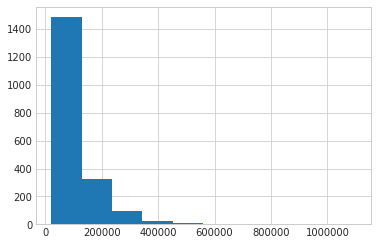

In [149]:
data2['price'].hist()

In [150]:
std_3 = data2[np.abs(data2['euro_per_sqm']-data2['euro_per_sqm'].mean())>(3*data2['euro_per_sqm'].std())]

In [151]:
len(std_3), len(data2)

(8, 1942)

In [152]:
std_3[['price','euro_per_sqm','area','district']]

,price,euro_per_sqm,area,district
28,450000.0,3214.285714,140.0,Stari grad
803,209000.0,3483.333333,60.0,Stari grad
1377,110000.0,4400.000000,25.0,Stari grad
1543,365000.0,3578.431373,102.0,Stari grad
1637,722800.0,11658.064516,62.0,Palilula
1678,1100000.0,4044.117647,272.0,Savski Venac
1745,369500.0,3770.408163,98.0,Vračar
1746,383750.0,3336.956522,115.0,Vračar


In [153]:
data2[data2['price']==722800.0]['price'] = 72280.0

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
data2.head()

,price,year,district,area,rooms,floor,tot_floors,type,cent_heat,rem_heat,...,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12
0,220000.0,2015.0,Zvezdara,172.0,5.0,4.0,6.0,stan,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,124000.0,1970.0,Vračar,105.0,4.0,3.0,10.0,stan,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,69500.0,1970.0,Vračar,42.0,1.5,1.0,4.0,stan,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,140000.0,2001.0,Vračar,86.0,3.0,2.0,6.0,stan,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,129900.0,1988.0,Stari grad,78.0,3.5,2.0,6.0,stan,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [155]:
data2.dtypes


price           float64
year            float64
district         object
area            float64
rooms           float64
floor           float64
tot_floors      float64
type             object
cent_heat       float64
rem_heat        float64
intercom        float64
internet        float64
cable           float64
sewer           float64
aircon          float64
elevator        float64
new             float64
parking         float64
basement        float64
phone           float64
terrace         float64
being_built     float64
papers          float64
enterable       float64
euro_per_sqm    float64
coordinates      object
latitude        float64
longitude       float64
D0                uint8
D1                uint8
D2                uint8
D3                uint8
D4                uint8
D5                uint8
D6                uint8
D7                uint8
D8                uint8
D9                uint8
D10               uint8
D11               uint8
D12               uint8
dtype: object

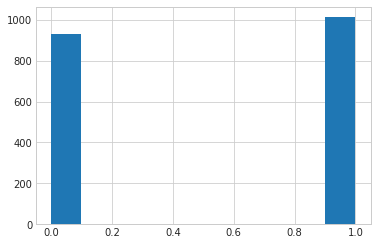

In [156]:
# remove disctrict, type, coordinates
data2.cent_heat.hist()

In [157]:
# remove disctrict, type, coordinates
del data2['coordinates']
del data2['type']
del data2['district']

In [158]:
data2['rooms'].describe()

count    1942.000000
mean        2.599382
std         1.063618
min         0.500000
25%         2.000000
50%         2.500000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64

In [159]:
len(data2)

1942

In [160]:
data2.head()

,price,year,area,rooms,floor,tot_floors,cent_heat,rem_heat,intercom,internet,...,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12
0,220000.0,2015.0,172.0,5.0,4.0,6.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,124000.0,1970.0,105.0,4.0,3.0,10.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,69500.0,1970.0,42.0,1.5,1.0,4.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,140000.0,2001.0,86.0,3.0,2.0,6.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,129900.0,1988.0,78.0,3.5,2.0,6.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


Save the data to a csv file - cleaned.csv

In [161]:
data2.to_csv('cleaned.csv')